In [191]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge #l2/l1 regualrization+linear regression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [192]:
df=pd.read_csv('supershops.csv')
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [193]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [194]:
df.Transport.mean()

np.float64(215331.7324489796)

In [195]:
df.dropna(inplace=True)# Removes all rows with NaN values (modifies the original DataFrame)

In [196]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [197]:
x=df.drop(['Profit', 'Area'], axis=1)  #axis='columns'

In [198]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [199]:
y=df[['Profit']]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [200]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.75, random_state=0)

In [201]:
x_train.shape

(36, 3)

In [202]:
x_train.head()

,Marketing Spend,Administration,Transport
28,66051.52,182645.56,118148.20
49,0.00,116983.80,45173.06
2,153441.51,101145.55,407934.54
47,0.00,135426.92,0.00
18,91749.16,114175.79,294919.57


In [203]:
y_train.head()

,Profit
28,103282.38
49,14681.40
2,191050.39
47,42559.73
18,124266.90


In [204]:
x_test.shape

(13, 3)

In [205]:
x_train2, x_test2, y_train2, y_test2= train_test_split(x_test, y_test, train_size=0.50, random_state=0)

In [206]:
y_train2.shape

(6, 1)

In [207]:
x_test2.shape

(7, 3)

In [189]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [208]:
df=df.drop(columns=['Area'])

In [209]:
df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [210]:
df.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


# OLS

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  49 non-null     float64
 1   Administration   49 non-null     float64
 2   Transport        49 non-null     float64
 3   Profit           49 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [213]:
model = LinearRegression() # polynomial regression with degree 1
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [214]:
y_pred=model.predict(x_test)

In [215]:
y_pred

array([[ 90707.18524202],
       [166377.24276987],
       [124018.59727829],
       [ 93252.51801345],
       [ 97588.41924098],
       [ 68948.39245538],
       [ 89037.14295216],
       [ 73472.98068535],
       [159657.23912108],
       [129149.84623501],
       [128674.69774365],
       [ 88409.42998689],
       [ 96436.18820079]])

In [216]:
df.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [217]:
model.coef_

array([[0.63434285, 0.09110112, 0.09838741]])

In [218]:
model.intercept_

array([31880.21334994])

In [219]:
model.predict([[153441.51, 101145.55, 407934.54]])  # using 2d always

array([[178564.83304429]])

In [220]:
y_test.shape

(13, 1)

In [223]:
model.predict(x_test)  #predict y

array([[ 90707.18524202],
       [166377.24276987],
       [124018.59727829],
       [ 93252.51801345],
       [ 97588.41924098],
       [ 68948.39245538],
       [ 89037.14295216],
       [ 73472.98068535],
       [159657.23912108],
       [129149.84623501],
       [128674.69774365],
       [ 88409.42998689],
       [ 96436.18820079]])

In [224]:
y_test  # Original Y

,Profit
30,99937.59
4,166187.94
27,105008.31
31,97483.56
33,96778.92
38,81229.06
35,96479.51
41,77798.83
7,155752.60
10,146121.95


In [225]:
y_pred.shape

(13, 1)

In [226]:
mse=mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 101360809.28512508


In [227]:
model.score(x_test,y_test)  # test accuracy

0.8744319145336101

In [228]:
model.score(x_train, y_train)  # train accuracy

0.905033885280169

# Ploynomial

In [229]:
df.corr()

,Marketing Spend,Administration,Transport,Profit
Marketing Spend,1.000000,0.227141,0.718574,0.937853
Administration,0.227141,1.000000,0.009534,0.197201
Transport,0.718574,0.009534,1.000000,0.782578
Profit,0.937853,0.197201,0.782578,1.000000


In [230]:
from sklearn.preprocessing import PolynomialFeatures
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


# Degree 2

In [235]:
poly = PolynomialFeatures(degree=2) # polynomial regression with degree 2
X_poly = poly.fit_transform(x)

In [236]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11


In [240]:
x_train, x_test, y_train, y_test= train_test_split(X_poly, y, test_size=0.25, random_state=0)

In [241]:
x_train.shape

(36, 10)

In [242]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [243]:
y_pred2 = model2.predict(x_test) 

In [244]:
y_pred2

array([[101606.42692503],
       [164653.76827387],
       [131119.0461182 ],
       [104593.86990246],
       [ 99609.9156716 ],
       [ 68898.2337949 ],
       [ 92076.37087657],
       [ 72287.07988882],
       [154325.98722053],
       [128236.41897548],
       [128001.27841731],
       [110500.67878475],
       [ 76394.97788961]])

In [245]:
mse = mean_squared_error(y_test, y_pred2)
print('MSE:', mse)

MSE: 162866427.121808


In [246]:
model2.score(x_test, y_test) #testing score

0.7982373504644271

In [247]:
model2.score(x_train, y_train) # training score

0.9505396347868063

# Degree 3 or higher

In [270]:
poly = PolynomialFeatures(degree=4) # polynomial regression with degree 4
X_poly_deg4 = poly.fit_transform(x) 

In [271]:
X_poly_deg4.shape

(49, 35)

In [272]:
pd.DataFrame(X_poly_deg4).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,114523.61,136897.80,471784.10,1.311566e+10,1.567803e+10,5.403042e+10,1.874101e+10,6.458621e+10,2.225802e+11,...,2.919286e+21,2.938221e+20,1.012584e+21,3.489620e+21,1.202610e+22,3.512254e+20,1.210411e+21,4.171378e+21,1.437561e+22,4.954196e+22
1,1.0,162597.70,151377.59,443898.53,2.643801e+10,2.461365e+10,7.217688e+10,2.291517e+10,6.719629e+10,1.970459e+11,...,5.209502e+21,5.640260e+20,1.653946e+21,4.850019e+21,1.422216e+22,5.251052e+20,1.539815e+21,4.515341e+21,1.324075e+22,3.882709e+22
2,1.0,153441.51,101145.55,407934.54,2.354430e+10,1.551993e+10,6.259409e+10,1.023042e+10,4.126076e+10,1.664106e+11,...,3.918020e+21,1.587754e+20,6.403640e+20,2.582680e+21,1.041632e+22,1.046615e+20,4.221150e+20,1.702451e+21,6.866228e+21,2.769248e+22
3,1.0,144372.41,118671.85,383199.62,2.084339e+10,1.713294e+10,5.532345e+10,1.408301e+10,4.547501e+10,1.468419e+11,...,3.060684e+21,2.412833e+20,7.791206e+20,2.515834e+21,8.123804e+21,1.983311e+20,6.404249e+20,2.067976e+21,6.677639e+21,2.156256e+22
4,1.0,142107.34,91391.77,366168.42,2.019450e+10,1.298744e+10,5.203522e+10,8.352456e+09,3.346478e+10,1.340793e+11,...,2.707664e+21,1.084770e+20,4.346219e+20,1.741347e+21,6.976847e+21,6.976351e+19,2.795131e+20,1.119892e+21,4.486935e+21,1.797726e+22


In [273]:
x_train, x_test, y_train, y_test= train_test_split(X_poly, y, test_size=0.25, random_state=0)

In [274]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [275]:
y_pred2 = model2.predict(x_test) 

In [276]:
y_pred2

array([[101606.42692503],
       [164653.76827387],
       [131119.0461182 ],
       [104593.86990246],
       [ 99609.9156716 ],
       [ 68898.2337949 ],
       [ 92076.37087657],
       [ 72287.07988882],
       [154325.98722053],
       [128236.41897548],
       [128001.27841731],
       [110500.67878475],
       [ 76394.97788961]])

In [277]:
model2.score(x_test, y_test) # testing

0.7982373504644271

In [278]:
model2.score(x_train, y_train) # training

0.9505396347868063

In [279]:
x.head()

,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [280]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [284]:
model2.predict([[114523.61, 136897.80, 471784.10]]) # what is the solution??

ValueError: X has 3 features, but LinearRegression is expecting 10 features as input.

# Make Pipeline

In [285]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

In [286]:
pipeline.fit(x,y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('polynomialfeatures', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",4
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",True
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [287]:
pipeline.predict(x)[0]

array([191459.9664709])

In [288]:
pipeline.predict(x)[0] #first row only

array([191459.9664709])

In [289]:
pipeline.predict([[114523.61, 136897.80, 471784.10]])

array([[191459.9664709]])

# break pipeline

In [299]:
nwx = poly.transform([[114523.61, 136897.80, 471784.10]])
nwx

array([[1.00000000e+00, 1.14523610e+05, 1.36897800e+05, 4.71784100e+05,
        1.31156572e+10, 1.56780303e+10, 5.40304183e+10, 1.87410076e+10,
        6.45862054e+10, 2.22580237e+11, 1.50205242e+15, 1.79550462e+15,
        6.18775855e+15, 2.14628785e+15, 7.39664539e+15, 2.54906923e+16,
        2.56560272e+15, 8.84170942e+15, 3.04707448e+16, 1.05009817e+17,
        1.72020465e+20, 2.05627671e+20, 7.08644447e+20, 2.45800633e+20,
        8.47090532e+20, 2.91928610e+21, 2.93822085e+20, 1.01258448e+21,
        3.48961969e+21, 1.20261033e+22, 3.51225368e+20, 1.21041057e+21,
        4.17137792e+21, 1.43756129e+22, 4.95419619e+22]])

# L1 Regularization with LR - Lasso

In [300]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


# L2 Regularization with LR - Ridge

In [301]:
ridge_model = Ridge() 
ridge_model.fit(x_train, y_train)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


# Performance

In [302]:
lasso_predictions = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

In [303]:
print('Lasso MSE:', lasso_mse)

Lasso MSE: 162762947.0115534


In [305]:
ridge_predictions = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

In [306]:
print('Ridge MSE:', ridge_mse)

Ridge MSE: 162866427.0506392


In [309]:
lasso_SCORE = lasso_model.score(x_test, y_test)
lasso_SCORE

0.7983655439883359

In [310]:
ridge_SCORE = ridge_model.score(x_test, y_test)
ridge_SCORE

0.7982373505525926

In [311]:
scores = [lasso_SCORE, ridge_SCORE]
models = ['Lasso', 'Ridge']

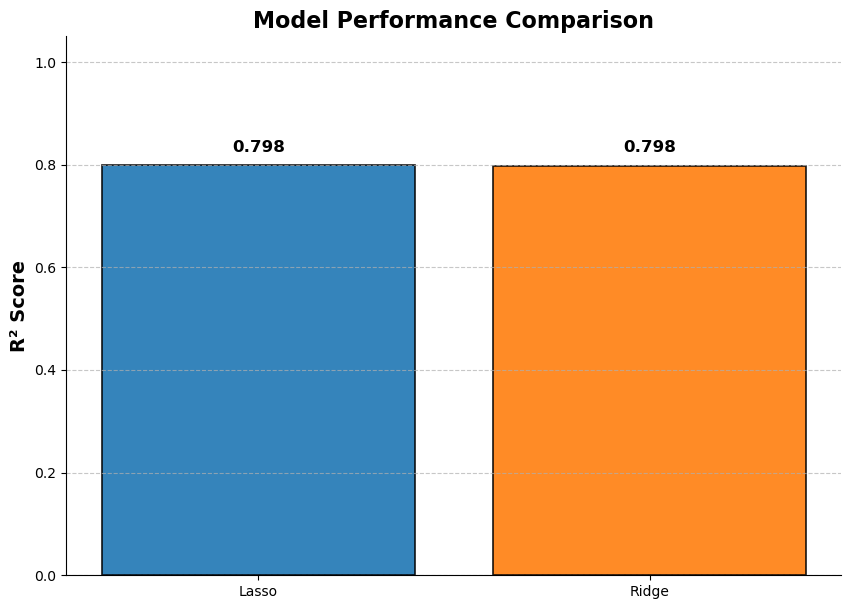

In [314]:
scores = [lasso_SCORE, ridge_SCORE]
models = ['Lasso', 'Ridge']

# Use a nice color palette
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

plt.figure(figsize=(10,7))

bars = plt.bar(models, scores, color=colors, edgecolor='black', linewidth=1.2, alpha=0.9)

# Add value labels on top
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{score:.3f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Labels and title
plt.ylabel('R² Score', fontsize=14, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylim(0, 1.05)

# Clean spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
